In [1]:
import pandas as pd
import numpy as np

In [2]:
dados = pd.read_csv('dados_alura.csv')
dados

,id_cliente,id_emprestimo,id_historico,tipo_imovel,motivo_emprestimo,grupo,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA
0,AspC7qDK-5Esh,kZHfWgGv-0dWJ,UwfbzeaW-9tQt,alugado,ensino,B,21.0,60000.0,2.0,8000.0,11.26,0.13,3.0,0.0,0.0
1,2NjYU2iT-fGSm,j7elJxsY-eTEQ,viRQ2WYn-yJ2G,financiado,ensino,A,40.0,70000.0,6.0,18000.0,7.90,0.26,14.0,0.0,0.0
2,nTOKgZCT-YPUD,t9dKvc6a-4eAL,IEHObaim-KPC9,financiado,saude,C,29.0,115000.0,3.0,22000.0,15.23,0.19,7.0,1.0,0.0
3,J3jGNZeh-OzZE,NaelpPC5-t2kz,GvqL52S8-S8OH,alugado,saude,B,26.0,84996.0,0.0,9000.0,11.26,0.11,2.0,0.0,0.0
4,flpZfspk-bUuL,4NHe4vfi-QLvW,fbc8cPEp-uJEB,alugado,quitar,A,23.0,54500.0,2.0,8000.0,11.26,0.15,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34473,IuYkEXvw-YDnc,IT0YNmM9-xJUf,q0YwGXaQ-ZTgQ,alugado,saude,D,39.0,33996.0,6.0,4000.0,11.49,0.12,13.0,0.0,1.0
34474,toJSgLh4-Sf0s,dBBYeSyf-N3y2,QU4yUUO4-sZ0f,financiado,reforma,A,24.0,36000.0,6.0,14775.0,6.62,0.41,4.0,0.0,0.0
34475,ezodwdzy-IgP3,Z0OQkNXo-noen,W6NpiRzO-8o5z,financiado,quitar,A,27.0,39600.0,11.0,4800.0,6.76,0.12,9.0,0.0,0.0
34476,zcvLEBEd-JHhI,EtCzqy1B-QYEL,3fcjJLaj-Bkio,financiado,saude,C,30.0,39996.0,8.0,10000.0,12.73,0.25,6.0,0.0,0.0


In [3]:
dados.isnull().sum()

id_cliente             0
id_emprestimo          0
id_historico           0
tipo_imovel            0
motivo_emprestimo      0
grupo                  0
idade                  0
salario                0
tempo_trabalhando      0
valor_emprestimo       0
juros                  0
emp_sal                0
tempo_cliente          0
INADIMPLENCIA          0
RISCO_INADIMPLENCIA    0
dtype: int64

## Testando apenas com os dados numéricos

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

x = dados[['idade', 'salario', 'tempo_trabalhando', 'valor_emprestimo', 'juros', 'emp_sal', 'tempo_cliente', 'INADIMPLENCIA']]
y = dados['RISCO_INADIMPLENCIA']
SEED = 1
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
dummy_clf = DummyClassifier()
dummy_clf.fit(treino_x, treino_y)
acuracia = dummy_clf.score(teste_x, teste_y) * 100
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_y)))
print("A acurácia do dummy classifier foi %.2f%%" % acuracia)

Treinaremos com 25858 elementos e testaremos com 8620 elementos
A acurácia do dummy classifier foi 78.20%


## Como os dados estão desbalanceados precisamos fazer ajustes, vamos usar o SMOTE.

In [5]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()  # Instancia um objeto da classe SMOTE
x, y = smt.fit_resample(x, y)  # Realiza a reamostragem do conjunto de dados

In [6]:
dados = pd.concat([x, y], axis=1)  # Concatena a variável target (y) com as features (x)

# Verifica se o balanceamento e a concatenação estão corretos.
dados.head(2)

,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA
0,21.0,60000.0,2.0,8000.0,11.26,0.13,3.0,0.0,0.0
1,40.0,70000.0,6.0,18000.0,7.90,0.26,14.0,0.0,0.0


## Agora precisamos 'escalar' os dados para que as distâncias possam ser calculadas pelo KNN 

In [7]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
x_normalizado = norm.fit_transform(x)
x_normalizado

array([[-1.12208814, -0.00260236, -0.66888176, ..., -0.55331203,
        -0.71221946, -0.57421577],
       [ 2.11419409,  0.2040532 ,  0.39272986, ...,  0.51946301,
         2.15061756, -0.57421577],
       [ 0.24055701,  1.1340032 , -0.40347885, ..., -0.05818509,
         0.32881218,  2.02544481],
       ...,
       [ 0.19353952, -0.59255957, -0.90335673, ...,  1.57907556,
        -0.31624062, -0.57421577],
       [-0.65724587, -0.3125857 , -1.19968757, ...,  1.09711112,
        -0.97247737, -0.57421577],
       [ 0.67266835,  0.2040532 , -0.61971823, ..., -1.28835929,
         0.04444904, -0.57421577]])

In [8]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x_normalizado, y, test_size=0.3)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(treino_x, treino_y)
predito_knn = knn.predict(teste_x)
acuracia = accuracy_score(teste_y, predito_knn) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 80.87%


In [10]:
from sklearn.model_selection import cross_validate
modelo = knn
results = cross_validate(modelo, x_normalizado, y, cv = 5, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, cv = 5 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, cv = 5 = [78.13, 85.09]


In [11]:
from sklearn.model_selection import cross_val_score
clf = knn
clf = clf.fit(treino_x, treino_y)
previsoes = clf.predict(teste_x)
media = cross_val_score(clf, treino_x, treino_y, cv=5).mean()
desvio_padrao = cross_val_score(clf, treino_x, treino_y, cv=5).std()
print("Accuracy com cross validation, cv = 5 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, cv = 5 = [79.50, 81.58]


In [12]:
cross_validate(modelo, x_normalizado, y, cv = 5)

{'fit_time': array([0.15157199, 0.07088232, 0.17164993, 0.15734863, 0.16122532]),
 'score_time': array([1.11172676, 2.35383415, 2.28014159, 2.46542621, 2.06583524]),
 'test_score': array([0.78331015, 0.8134446 , 0.82678042, 0.8307678 , 0.82631677])}

In [13]:
cross_val_score(clf, treino_x, treino_y, cv=5)

array([0.80818651, 0.79772155, 0.80209299, 0.80593456, 0.81295536])

In [14]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='f1')

array([0.81076843, 0.79947472, 0.80274624, 0.8062938 , 0.81474679])

In [15]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='accuracy')

array([0.80818651, 0.79772155, 0.80209299, 0.80593456, 0.81295536])

In [16]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='average_precision')

array([0.84672792, 0.84675031, 0.84874842, 0.85154552, 0.85182584])

In [17]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='precision')

array([0.80113636, 0.79394888, 0.8014764 , 0.8061872 , 0.80838323])

In [18]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='recall')

array([0.82063492, 0.80507802, 0.8040201 , 0.80640042, 0.82121132])

In [19]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='roc_auc')

array([0.87894407, 0.87540658, 0.8760594 , 0.87758626, 0.88181869])

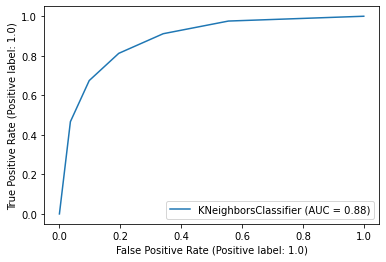

In [20]:
from sklearn.metrics import RocCurveDisplay
clf_disp = RocCurveDisplay.from_estimator(clf, teste_x, teste_y)

In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(teste_y, previsoes))

[[6537 1583]
 [1512 6545]]


## Agora transformando os dados categóricos

In [22]:
dados = pd.read_csv('dados.csv')
df_dummies = pd.get_dummies(dados.drop(['id_cliente', 'id_emprestimo', 'id_historico', 
        'idade', 'salario', 'tempo_trabalhando',
       'valor_emprestimo', 'juros', 'emp_sal', 'tempo_cliente',
       'INADIMPLENCIA', 'RISCO_INADIMPLENCIA'], axis = 1))
df_dummies

,tipo_imovel_alugado,tipo_imovel_financiado,tipo_imovel_outro,tipo_imovel_proprio,motivo_emprestimo_ensino,motivo_emprestimo_pessoal,motivo_emprestimo_quitar,motivo_emprestimo_reforma,motivo_emprestimo_risco,motivo_emprestimo_saude,grupo_A,grupo_B,grupo_C,grupo_D,grupo_E,grupo_F,grupo_G
0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34473,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
34474,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
34475,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
34476,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [23]:
df_modificado = dados[['id_cliente', 'id_emprestimo', 'id_historico', 
        'idade', 'salario', 'tempo_trabalhando',
       'valor_emprestimo', 'juros', 'emp_sal', 'tempo_cliente',
       'INADIMPLENCIA', 'RISCO_INADIMPLENCIA']]

In [24]:
dados_final = pd.concat([df_modificado, df_dummies], axis = 1)
dados_final.head()

,id_cliente,id_emprestimo,id_historico,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,...,motivo_emprestimo_reforma,motivo_emprestimo_risco,motivo_emprestimo_saude,grupo_A,grupo_B,grupo_C,grupo_D,grupo_E,grupo_F,grupo_G
0,AspC7qDK-5Esh,kZHfWgGv-0dWJ,UwfbzeaW-9tQt,21.0,60000.0,2.0,8000.0,11.26,0.13,3.0,...,0,0,0,0,1,0,0,0,0,0
1,2NjYU2iT-fGSm,j7elJxsY-eTEQ,viRQ2WYn-yJ2G,40.0,70000.0,6.0,18000.0,7.90,0.26,14.0,...,0,0,0,1,0,0,0,0,0,0
2,nTOKgZCT-YPUD,t9dKvc6a-4eAL,IEHObaim-KPC9,29.0,115000.0,3.0,22000.0,15.23,0.19,7.0,...,0,0,1,0,0,1,0,0,0,0
3,J3jGNZeh-OzZE,NaelpPC5-t2kz,GvqL52S8-S8OH,26.0,84996.0,0.0,9000.0,11.26,0.11,2.0,...,0,0,1,0,1,0,0,0,0,0
4,flpZfspk-bUuL,4NHe4vfi-QLvW,fbc8cPEp-uJEB,23.0,54500.0,2.0,8000.0,11.26,0.15,2.0,...,0,0,0,1,0,0,0,0,0,0


In [25]:
x = dados_final.drop(['id_cliente', 'id_emprestimo', 'id_historico', 'RISCO_INADIMPLENCIA'], axis = 1)
y = dados_final['RISCO_INADIMPLENCIA']

In [26]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
dummy_clf = DummyClassifier()
dummy_clf.fit(treino_x, treino_y)
acuracia = dummy_clf.score(teste_x, teste_y) * 100
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_y)))
print("A acurácia do dummy classifier foi %.2f%%" % acuracia)

Treinaremos com 25858 elementos e testaremos com 8620 elementos
A acurácia do dummy classifier foi 78.20%


In [27]:
norm = StandardScaler()
x_normalizado = norm.fit_transform(x)
x_normalizado

array([[-1.08149709, -0.1116195 , -0.6876957 , ..., -0.17416087,
        -0.08631992, -0.04312433],
       [ 1.97663927,  0.07905265,  0.30373748, ..., -0.17416087,
        -0.08631992, -0.04312433],
       [ 0.20613927,  0.93707735, -0.43983741, ..., -0.17416087,
        -0.08631992, -0.04312433],
       ...,
       [-0.11576982, -0.5005907 ,  1.54302896, ..., -0.17416087,
        -0.08631992, -0.04312433],
       [ 0.36709382, -0.49304008,  0.79945407, ..., -0.17416087,
        -0.08631992, -0.04312433],
       [-0.27672436, -0.20703185,  0.79945407, ..., -0.17416087,
        -0.08631992, -0.04312433]])

In [28]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x_normalizado, y, test_size=0.3)

In [29]:
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(treino_x, treino_y)
predito_knn = knn.predict(teste_x)
acuracia = accuracy_score(teste_y, predito_knn) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 88.23%


In [30]:
modelo = knn
results = cross_validate(modelo, x_normalizado, y, cv = 5, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, cv = 5 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, cv = 5 = [87.74, 89.27]


In [31]:
clf = knn
clf = clf.fit(treino_x, treino_y)
previsoes = clf.predict(teste_x)
media = cross_val_score(clf, treino_x, treino_y, cv=5).mean()
desvio_padrao = cross_val_score(clf, treino_x, treino_y, cv=5).std()
print("Accuracy com cross validation, cv = 5 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, cv = 5 = [88.03, 89.07]


In [32]:
cross_validate(modelo, x_normalizado, y, cv = 5)

{'fit_time': array([0.00986004, 0.01012993, 0.00573635, 0.01526093, 0.01731968]),
 'score_time': array([0.92901731, 0.69614983, 1.00896335, 0.73970175, 0.91971421]),
 'test_score': array([0.88863109, 0.88544084, 0.88732599, 0.88614938, 0.87773749])}

In [33]:
cross_val_score(clf, treino_x, treino_y, cv=5)

array([0.88336441, 0.88543609, 0.88647193, 0.88232857, 0.88976378])

In [34]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='f1')

array([0.67846945, 0.68704018, 0.69213483, 0.68303571, 0.70509978])

In [35]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='accuracy')

array([0.88336441, 0.88543609, 0.88647193, 0.88232857, 0.88976378])

In [36]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='average_precision')

array([0.6992109 , 0.70112403, 0.72192588, 0.68654117, 0.72735248])

In [37]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='precision')

array([0.84255319, 0.84188627, 0.83923706, 0.82037534, 0.83794466])

In [38]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='recall')

array([0.56787763, 0.58030593, 0.58891013, 0.58508604, 0.60861244])

In [39]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='roc_auc')

array([0.83562044, 0.83512688, 0.8515684 , 0.83077079, 0.85769264])

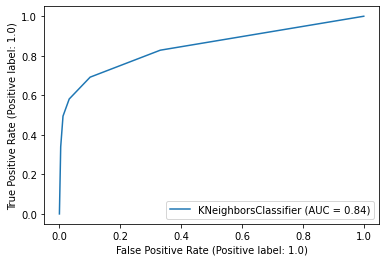

In [40]:
from sklearn.metrics import RocCurveDisplay
clf_disp = RocCurveDisplay.from_estimator(clf, teste_x, teste_y)

In [41]:
print(confusion_matrix(teste_y, previsoes))

[[7797  259]
 [ 958 1330]]
